### Lesson 5.4: Final Project - Part 1

Summary: This lesson is the first part of your final project. In this assignment, you will focus on importing, cleaning, preprocessing, and summarizing your baseball pitching data, as provided in a Trackman Report CSV file. 

Key Concepts:
- Importing data using pandas
- Cleaning and preprocessing data
- Summarizing data using descriptive statistics

**The link to your assignment is [here](https://chat.openai.com/share/911fa90a-0d8a-45ee-a20f-a0822e327885)**

Assignment:
1. Importing and Cleaning the Data
    - Use pandas to import your Trackman Report data into a DataFrame.
    - Clean the data:
        - Handle any missing values in the data. This could mean dropping rows or columns with missing values, or filling in missing values with a specified value.
        - Rename columns for consistency and ease of understanding. You might not have exact matches for "velocity", "spin rate", "pitch type", and "result", so figure out which columns correspond to these descriptions and rename them accordingly.
    - Preprocess the data:
        - Create a smaller DataFrame that only includes the columns of interest ("velocity", "spin rate", "pitch type", and "result").
        - Ensure the data types for these columns are appropriate for further analysis. For example, "velocity" and "spin rate" should be numeric, while "pitch type" and "result" should be categorical.
2. Summarizing the Data
    - Use pandas methods to calculate basic descriptive statistics for your data, including mean, median, mode, range, and standard deviation.
    - Identify any interesting initial observations from these statistics. For example, what is the average velocity or spin rate across all pitches?
    - Use matplotlib to create simple visualizations of these statistics, such as a histogram for velocity or a bar plot for pitch type frequency.

In [46]:
import os
import pandas as pd
original_df = pd.read_csv('/Users/mitchellsparks/Downloads/finaltrackman.csv')
df = original_df.copy()
df.head()
### MOVE EVERYTHING UNDER THIS LINE INTO THE NEXT CELL BELOW; YOUR FIRST CELL SHOULD JUST BE SETTING UP IMPORTS AND DF_COPY






,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,finaltrackman
PitchNo,Date,Time,PAofInning,PitchofPA,Pitcher,PitcherId,PitcherThrows,PitcherTeam,Batter,BatterId,BatterSide,BatterTeam,PitcherSet,Inning,Top/Bottom,Outs,Balls,Strikes,TaggedPitchType,AutoPitchType,PitchCall,KorBB,TaggedHitType,PlayResult,OutsOnPlay,RunsScored,Notes,RelSpeed,VertRelAngle,HorzRelAngle,SpinRate,SpinAxis,Tilt,RelHeight,RelSide,Extension,VertBreak,InducedVertBreak,HorzBreak,PlateLocHeight,PlateLocSide,ZoneSpeed,VertApprAngle,HorzApprAngle,ZoneTime,ExitSpeed,Angle,Direction,HitSpinRate,PositionAt110X,PositionAt110Y,PositionAt110Z,Distance,LastTrackedDistance,Bearing,HangTime,pfxx,pfxz,x0,y0,z0,vx0,vy0,vz0,ax0,ay0,az0,HomeTeam,AwayTeam,Stadium,Level,League,GameID,PitchUID,EffectiveVelo,MaxHeight,MeasuredDuration,SpeedDrop,PitchLastMeasuredX,PitchLastMeasuredY,PitchLastMeasuredZ,ContactPositionX,ContactPositionY,ContactPositionZ,GameUID,UTCDate,UTCTime,LocalDateTime,UTCDateTime,AutoHitType,System,HomeTeamForeignID,AwayTeamForeignID,GameForeignID,Catcher,CatcherId,CatcherThrows,CatcherTeam,PlayID,PitchTrajectoryXc0,PitchTrajectoryXc1,PitchTrajectoryXc2,PitchTrajectoryYc0,PitchTrajectoryYc1,PitchTrajectoryYc2,PitchTrajectoryZc0,PitchTrajectoryZc1,PitchTrajectoryZc2,HitSpinAxis,HitTrajectoryXc0,HitTrajectoryXc1,HitTrajectoryXc2,HitTrajectoryXc3,HitTrajectoryXc4,HitTrajectoryXc5,HitTrajectoryXc6,HitTrajectoryXc7,HitTrajectoryXc8,HitTrajectoryYc0,HitTrajectoryYc1,HitTrajectoryYc2,HitTrajectoryYc3,HitTrajectoryYc4,HitTrajectoryYc5,HitTrajectoryYc6,HitTrajectoryYc7,HitTrajectoryYc8,HitTrajectoryZc0,HitTrajectoryZc1,HitTrajectoryZc2,HitTrajectoryZc3,HitTrajectoryZc4,HitTrajectoryZc5,HitTrajectoryZc6,HitTrajectoryZc7,HitTrajectoryZc8,ThrowSpeed,PopTime,ExchangeTime,TimeToBase,CatchPositionX,CatchPositionY,CatchPositionZ,ThrowPositionX,ThrowPositionY,ThrowPositionZ,BasePositionX,BasePositionY,BasePositionZ,ThrowTrajectoryXc0,ThrowTrajectoryXc1,ThrowTrajectoryXc2,ThrowTrajectoryYc0,ThrowTrajectoryYc1,ThrowTrajectoryYc2,ThrowTrajectoryZc0,ThrowTrajectoryZc1,ThrowTrajectoryZc2,PitchReleaseConfidence,PitchLocationConfidence,PitchMovementConfidence,HitLaunchConfidence,HitLandingConfidence,CatcherThrowCatchConfidence,CatcherThrowReleaseConfidence,CatcherThrowLocationConfidence
1,2023-05-30,19:14:58.43,1,1,"Penrod, Zach",683068,Left,MIS_PAD,"Smith II, Milton",681999,Left,ROC_VIB,Undefined,1,Top,0,0,0,Fastball,Four-Seam,BallCalled,Undefined,Undefined,Undefined,0,0,NaN,94.31184,-5.371243,3.606587,2322.025118,154.679871,11:15,6.51717,-2.24442,6.01997,-14.22316,16.96773,-7.60103,0.33239,0.4671,87.46061,-8.039714,2.242641,0.401962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.83103,10.35942,1.96603,50,6.08683,-8.28232,-136.41204,-13.28881,9.22377,26.27645,-12.39498,MIS_PAD,ROC_VIB,OgrenPark,Independent,PIO,20230530-OgrenPark-2,8f6bb2e0-ff50-11ed-b453-ebf3d8e2a684,93.77109,NaN,NaN,6.85123,NaN,NaN,NaN,NaN,NaN,NaN,c3a11eb5-f8ee-4979-904a-4acaf63c13cc,2023-05-31,01:14:58.43,2023-05-30T19:14:58.4308268-06:00,2023-05-31T01:14:58.4308268Z,NaN,v3,518,551,NaN,"Bernard, Austin",676640,Right,MIS_PAD,7e1310ba-4992-4b47-bf20-0e602c07e04e,54.4807,-137.27243,13.13823,6.51531,-12.88295,-6.19749,2.24217,-8.58434,4.61188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN
2,2023-05-30,19:15:11.62,1,2,"Penrod, Zach",683068,Left,MIS_PAD,"Smith II, Milton",681999,Left,ROC_VIB,Undefined,1,Top,0,1,0,Fastball,Four-Seam,StrikeCalled,Undefined,Undefined,Undefined,0,0,NaN,91.98284,-2.922939,3.832704,2278.693963,150.799357,11:00,6.56807,-2.07916,6.01722,-18.02261,14.71036,-7.6841,2.35032,0.83594,84.9127,-6.302053,2.454486,0.411779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.91528,8.60737,1.78263,50,6.32844,

In [22]:
pd.read_csv('/Users/mitchellsparks/Downloads/finaltrackman.csv', sep=';')
df = pd.read_csv('/Users/mitchellsparks/Downloads/finaltrackman.csv', skiprows=1)
# This changed the rows to get the actual ones I needed at the top 
print(df.columns)


Index(['PitchNo', 'Date', 'Time', 'PAofInning', 'PitchofPA', 'Pitcher',
       'PitcherId', 'PitcherThrows', 'PitcherTeam', 'Batter',
       ...
       'ThrowTrajectoryZc1', 'ThrowTrajectoryZc2', 'PitchReleaseConfidence',
       'PitchLocationConfidence', 'PitchMovementConfidence',
       'HitLaunchConfidence', 'HitLandingConfidence',
       'CatcherThrowCatchConfidence', 'CatcherThrowReleaseConfidence',
       'CatcherThrowLocationConfidence'],
      dtype='object', length=167)


In [23]:
df = df[[ 'Pitcher', 'TaggedPitchType', 'PitcherThrows', 'SpinRate']]
#made a smaller df of the certain categories I needed 
df.columns = df.columns.str.upper() # fixed this to get all of the headings capitalized. did not set the index
df = df.rename(columns={'TaggedPitchType' : 'TaggedPitchAs', 'PitcherThrows' : 'PitcherHand'}) # renamed a few columns 

df.head()


,PITCHER,TAGGEDPITCHTYPE,PITCHERTHROWS,SPINRATE
0,"Penrod, Zach",Fastball,Left,2322.025118
1,"Penrod, Zach",Fastball,Left,2278.693963
2,"Penrod, Zach",Fastball,Left,2303.496943
3,"Penrod, Zach",Fastball,Left,2359.014349
4,"Penrod, Zach",Fastball,Left,2531.103469


In [39]:
print(df.columns)


Index(['PITCHER', 'TAGGEDPITCHTYPE', 'PITCHERTHROWS', 'SPINRATE'], dtype='object')


In [35]:
mean_df = df.select_dtypes(include=['float64', 'int64']).mean() # Get the mean for the spin rate 
print("Mean:\n", mean_df)
median_df = df.select_dtypes(include=['float64', 'int64']).median() # to get the median for spin rate 
print("\nMedian:\n", median_df)
mode_df = df.mode().iloc[0]  # find mode for spin rate 
print("\nMode:\n", mode_df)
range_df = df.select_dtypes(include=['float64', 'int64']).max() - df.select_dtypes(include=['float64', 'int64']).min() # Find the range of spin rate 
print("Range:\n", range_df)
std_dev_df = df.select_dtypes(include=['float64', 'int64']).std() # find standard deviation for spin rate 
print("\nStandard Deviation:\n", std_dev_df)


Mean:
 SPINRATE    2200.34139
dtype: float64

Median:
 SPINRATE    2254.474423
dtype: float64

Mode:
 PITCHER            Penrod, Zach
TAGGEDPITCHTYPE        Fastball
PITCHERTHROWS             Right
SPINRATE             990.126609
Name: 0, dtype: object
Range:
 SPINRATE    1783.274922
dtype: float64

Standard Deviation:
 SPINRATE    302.992137
dtype: float64


In [40]:
average_spin_rate = df['SPINRATE'].mean()
print("Average Spin Rate:", average_spin_rate)   # finding average an highest spin rate 
highest_spin_rate = df['SPINRATE'].max()
print("Highest Spin Rate:", highest_spin_rate)

Average Spin Rate: 2200.3413904798763
Highest Spin Rate: 2773.401531


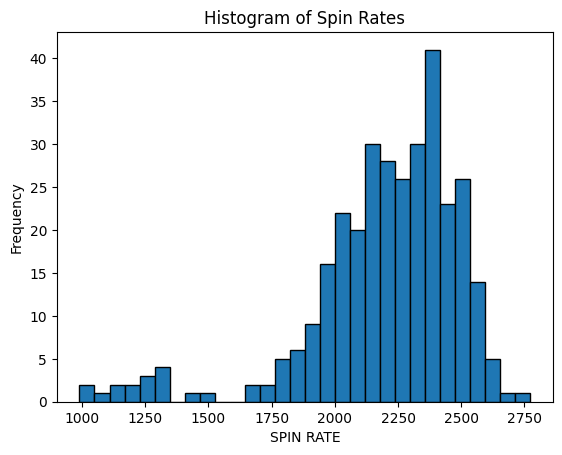

In [43]:
import matplotlib.pyplot as plt

plt.hist(df['SPINRATE'].dropna(), bins=30, edgecolor='black')  # dropna() to exclude NaN values

plt.title('Histogram of Spin Rates')
plt.xlabel('SPIN RATE')
plt.ylabel('Frequency')

plt.show()

### Lesson 5.5: Final Project - Part 2

Summary: This lesson is the second part of your final project. In this assignment, you will focus on analyzing, grouping, and visualizing your preprocessed pitching data to uncover deeper insights.

Key Concepts:
- Analyzing and grouping data using pandas
- Visualizing data with matplotlib

**The link to your assignment is [here](https://chat.openai.com/share/f22706e8-3f48-4032-8e1b-a476123f9507)**

Assignment:
1. Analyzing the Data
    - Dive deeper into the data to uncover trends or insights. Here are a few suggestions:
        - Analyze the relationships between variables. For instance, is there a correlation between velocity and spin rate? How does the result of the pitch change with different pitch types?
        - Group the data by certain variables and calculate summary statistics for these groups. For example, group by "pitch type" and calculate the average "velocity" and "spin rate" for each type.
2. Visualizing the Data
    - Use matplotlib to create detailed visualizations of your insights. This could include scatter plots to show relationships between variables, or grouped bar plots to compare summary statistics across different pitch types.
    - Remember to label your plots with titles, x and y axis labels, and legends where necessary.

In [47]:
import os
import pandas as pd
df = original_df.copy() #imported and created df 
df.head()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,finaltrackman
PitchNo,Date,Time,PAofInning,PitchofPA,Pitcher,PitcherId,PitcherThrows,PitcherTeam,Batter,BatterId,BatterSide,BatterTeam,PitcherSet,Inning,Top/Bottom,Outs,Balls,Strikes,TaggedPitchType,AutoPitchType,PitchCall,KorBB,TaggedHitType,PlayResult,OutsOnPlay,RunsScored,Notes,RelSpeed,VertRelAngle,HorzRelAngle,SpinRate,SpinAxis,Tilt,RelHeight,RelSide,Extension,VertBreak,InducedVertBreak,HorzBreak,PlateLocHeight,PlateLocSide,ZoneSpeed,VertApprAngle,HorzApprAngle,ZoneTime,ExitSpeed,Angle,Direction,HitSpinRate,PositionAt110X,PositionAt110Y,PositionAt110Z,Distance,LastTrackedDistance,Bearing,HangTime,pfxx,pfxz,x0,y0,z0,vx0,vy0,vz0,ax0,ay0,az0,HomeTeam,AwayTeam,Stadium,Level,League,GameID,PitchUID,EffectiveVelo,MaxHeight,MeasuredDuration,SpeedDrop,PitchLastMeasuredX,PitchLastMeasuredY,PitchLastMeasuredZ,ContactPositionX,ContactPositionY,ContactPositionZ,GameUID,UTCDate,UTCTime,LocalDateTime,UTCDateTime,AutoHitType,System,HomeTeamForeignID,AwayTeamForeignID,GameForeignID,Catcher,CatcherId,CatcherThrows,CatcherTeam,PlayID,PitchTrajectoryXc0,PitchTrajectoryXc1,PitchTrajectoryXc2,PitchTrajectoryYc0,PitchTrajectoryYc1,PitchTrajectoryYc2,PitchTrajectoryZc0,PitchTrajectoryZc1,PitchTrajectoryZc2,HitSpinAxis,HitTrajectoryXc0,HitTrajectoryXc1,HitTrajectoryXc2,HitTrajectoryXc3,HitTrajectoryXc4,HitTrajectoryXc5,HitTrajectoryXc6,HitTrajectoryXc7,HitTrajectoryXc8,HitTrajectoryYc0,HitTrajectoryYc1,HitTrajectoryYc2,HitTrajectoryYc3,HitTrajectoryYc4,HitTrajectoryYc5,HitTrajectoryYc6,HitTrajectoryYc7,HitTrajectoryYc8,HitTrajectoryZc0,HitTrajectoryZc1,HitTrajectoryZc2,HitTrajectoryZc3,HitTrajectoryZc4,HitTrajectoryZc5,HitTrajectoryZc6,HitTrajectoryZc7,HitTrajectoryZc8,ThrowSpeed,PopTime,ExchangeTime,TimeToBase,CatchPositionX,CatchPositionY,CatchPositionZ,ThrowPositionX,ThrowPositionY,ThrowPositionZ,BasePositionX,BasePositionY,BasePositionZ,ThrowTrajectoryXc0,ThrowTrajectoryXc1,ThrowTrajectoryXc2,ThrowTrajectoryYc0,ThrowTrajectoryYc1,ThrowTrajectoryYc2,ThrowTrajectoryZc0,ThrowTrajectoryZc1,ThrowTrajectoryZc2,PitchReleaseConfidence,PitchLocationConfidence,PitchMovementConfidence,HitLaunchConfidence,HitLandingConfidence,CatcherThrowCatchConfidence,CatcherThrowReleaseConfidence,CatcherThrowLocationConfidence
1,2023-05-30,19:14:58.43,1,1,"Penrod, Zach",683068,Left,MIS_PAD,"Smith II, Milton",681999,Left,ROC_VIB,Undefined,1,Top,0,0,0,Fastball,Four-Seam,BallCalled,Undefined,Undefined,Undefined,0,0,NaN,94.31184,-5.371243,3.606587,2322.025118,154.679871,11:15,6.51717,-2.24442,6.01997,-14.22316,16.96773,-7.60103,0.33239,0.4671,87.46061,-8.039714,2.242641,0.401962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.83103,10.35942,1.96603,50,6.08683,-8.28232,-136.41204,-13.28881,9.22377,26.27645,-12.39498,MIS_PAD,ROC_VIB,OgrenPark,Independent,PIO,20230530-OgrenPark-2,8f6bb2e0-ff50-11ed-b453-ebf3d8e2a684,93.77109,NaN,NaN,6.85123,NaN,NaN,NaN,NaN,NaN,NaN,c3a11eb5-f8ee-4979-904a-4acaf63c13cc,2023-05-31,01:14:58.43,2023-05-30T19:14:58.4308268-06:00,2023-05-31T01:14:58.4308268Z,NaN,v3,518,551,NaN,"Bernard, Austin",676640,Right,MIS_PAD,7e1310ba-4992-4b47-bf20-0e602c07e04e,54.4807,-137.27243,13.13823,6.51531,-12.88295,-6.19749,2.24217,-8.58434,4.61188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High,High,High,NaN,NaN,NaN,NaN,NaN
2,2023-05-30,19:15:11.62,1,2,"Penrod, Zach",683068,Left,MIS_PAD,"Smith II, Milton",681999,Left,ROC_VIB,Undefined,1,Top,0,1,0,Fastball,Four-Seam,StrikeCalled,Undefined,Undefined,Undefined,0,0,NaN,91.98284,-2.922939,3.832704,2278.693963,150.799357,11:00,6.56807,-2.07916,6.01722,-18.02261,14.71036,-7.6841,2.35032,0.83594,84.9127,-6.302053,2.454486,0.411779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.91528,8.60737,1.78263,50,6.32844,

In [44]:
pd.read_csv('/Users/mitchellsparks/Downloads/finaltrackman.csv', sep=';')
df = pd.read_csv('/Users/mitchellsparks/Downloads/finaltrackman.csv', skiprows=1)
# needed tp set up the columns the right way again to get eveything to work
correlation = df['RelSpeed'].corr(df['SpinRate']) # to find the correlation between the speed and spin rate 
print(f"Correlation between RelSpeed and SpinRate: {correlation}")



Correlation between RelSpeed and SpinRate: 0.4748278266593512


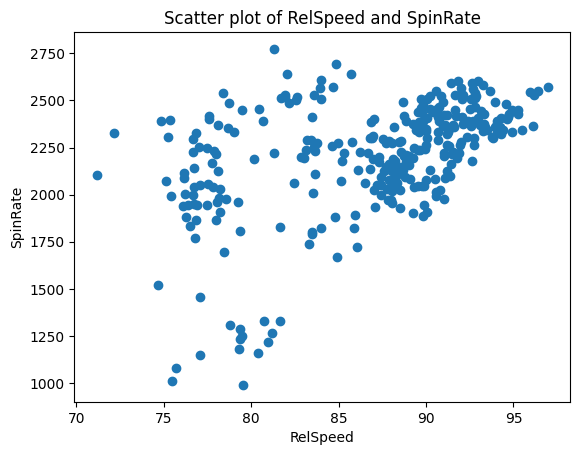

In [7]:
import matplotlib.pyplot as plt

plt.scatter(df['RelSpeed'], df['SpinRate']) #start to create scatte plot of 2 variables 
plt.title('Scatter plot of RelSpeed and SpinRate') 
plt.xlabel('RelSpeed')
plt.ylabel('SpinRate')
plt.show()

In [45]:
average_values = (
    df
    .groupby('TaggedPitchType')
    [['RelSpeed', 'SpinRate']]
    .mean()
)

print(average_values)


                  RelSpeed     SpinRate
TaggedPitchType                        
ChangeUp         79.770850  1740.360284
Curveball        73.389825  2305.313452
Fastball         90.729607  2289.166723
Sinker           75.240420  2304.233834
Slider           81.222667  2353.016332
TwoSeamFastBall  87.632930  2142.561826


Text(0, 0.5, 'SpinRate')

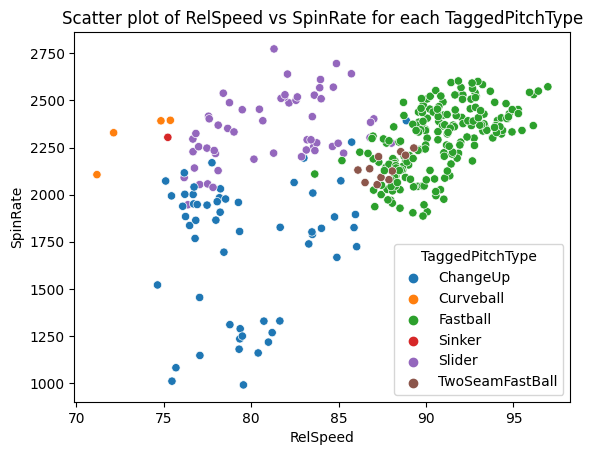

In [11]:
import seaborn as sns # imported to help with the graph interface and categorizing everything 
import matplotlib.pyplot as plt # to create the graph 

sns.scatterplot(data=df, x='RelSpeed', y='SpinRate', hue='TaggedPitchType') # basics for the scatter plot
plt.title('Scatter plot of RelSpeed vs SpinRate for each TaggedPitchType') # 
plt.xlabel('RelSpeed')
plt.ylabel('SpinRate')